# **Phishcord - AI-Powered Phishing Email Detector** <font>


## References:

* https://www.freecodecamp.org/news/data-cleaning-and-preprocessing-with-pandasbdvhj/#heading-what-is-data-cleaning
* https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/
* https://www.kdnuggets.com/data-cleaning-with-pandas
* https://medium.com/@azimkhan8018/email-spam-detection-with-machine-learning-a-comprehensive-guide-b65c6936678b
* https://www.researchgate.net/publication/378797444_E-Mail_Spam_Classification_using_Machine_Learning_Algorithms_and_Natural_Language_Processing
* https://blog.logrocket.com/email-spam-detector-python-machine-learning/


## 1. Setup


---



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymensaid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aymensaid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Loads the dataset
df = pd.read_csv('/Users/aymensaid/Downloads/dataset/phishing_email.csv')
#df = pd.read_csv('/Users/aymensaid/Downloads/dataset/SpamAssasin.csv')

# Displays 5 random emails from dataset
df.sample(5) 

,text_combined,label
50473,jonathan bailey haroldgunfirerobertssleepdisor...,1
9200,cheap oem soft shipping worldwide fuddy duddy ...,1
60785,tarik starr digraph750realitychurchcom taught ...,1
21137,resignation jenny lu today concluded investiga...,0
14488,facturas en cash si usted puede ver este email...,1


## 2. Initial Exploration And Data Cleaning

In [11]:
# Before dropping
df.shape

(82486, 2)

In [12]:
df

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


In [13]:
# Returns 0 - meaning there are no missing values
df.isnull().sum()

text_combined    0
label            0
dtype: int64

In [14]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print("Number of duplicate rows (after dropping):", df.duplicated().sum()) # must result in 0 to show it's successfully dropped 

Number of duplicate rows: 408
Number of duplicate rows (after dropping): 0


In [15]:
# before dropping duplicates:
# 1    42891
# 0    39595
print(df['label'].value_counts())

label
1    42845
0    39233
Name: count, dtype: int64


In [16]:
# After dropping
df.shape

(82078, 2)

## 3. EDA

### 3.1. Distribution of Levels

From the graph, most emails in the dataset (52.2%) are phishing. Whereas, regular emails in the dataset takes up 47.8% of the dataset. This is important as it allows me to know if the dataset is balanced to prevent any bias. The dataset is mostly balanced.

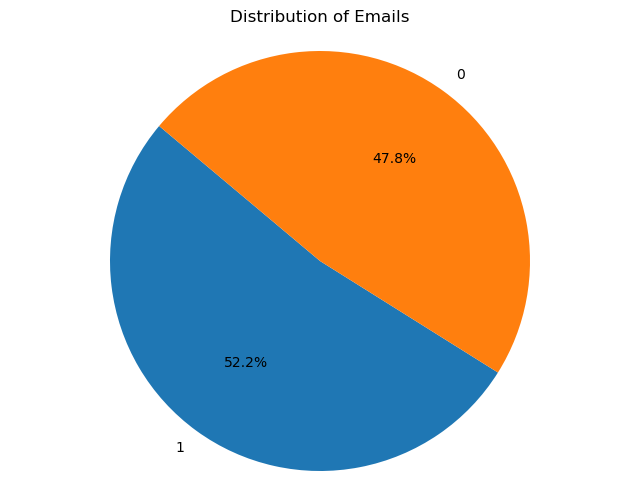

In [17]:
df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emails')
plt.axis('equal') 
plt.show()

### 3.2. Average Characters

In [20]:
df = df.copy()
df['num_character'] = df['text_combined'].apply(len)
df['num_word'] = df['text_combined'].apply(word_tokenize).apply(len)
df['num_sentence'] = df['text_combined'].apply(sent_tokenize).apply(len)

Average Length of Phishing Emails: 1060.692519547205
Average Length of Regular Emails: 1541.4561466112712


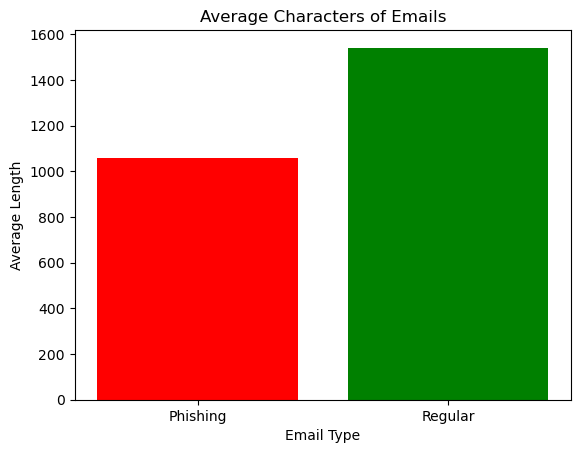

In [21]:
avg_length_spam = df[df['label'] == 1]['num_character'].mean()
avg_length_ham = df[df['label'] == 0]['num_character'].mean()
print("Average Length of Phishing Emails:", avg_length_spam)
print("Average Length of Regular Emails:", avg_length_ham)

# plotting
plt.bar(['Phishing', 'Regular'], [avg_length_spam, avg_length_ham], color=['red', 'green'])
plt.title('Average Characters of Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

### 3.3. Average Words

Average Words of Phishing Emails: 121.35023923444976
Average Words of Regular Emails: 203.70389722937324


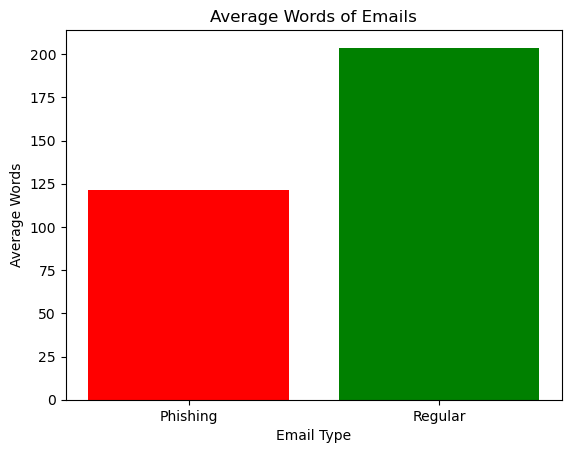

In [22]:
avg_word_spam = df[df['label'] == 1]['num_word'].mean()
avg_word_ham = df[df['label'] == 0]['num_word'].mean()
print("Average Words of Phishing Emails:", avg_word_spam)
print("Average Words of Regular Emails:", avg_word_ham)

# Plotting the graph
plt.bar(['Phishing', 'Regular'], [avg_word_spam, avg_word_ham], color=['Red', 'green'])
plt.title('Average Words of Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

### 3.4. Average Sentence

Average Sentence of Phishing Emails: 0.9999766600536819
Average Sentence of Regular Emails: 1.0


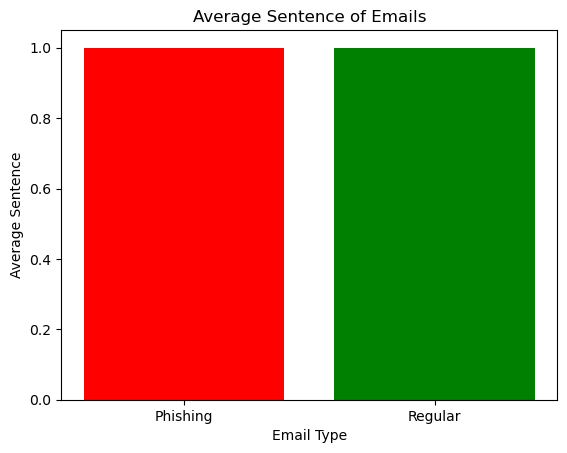

In [23]:
avg_sentence_spam = df[df['label'] == 1]['num_sentence'].mean()
avg_sentence_ham = df[df['label'] == 0]['num_sentence'].mean()
print("Average Sentence of Phishing Emails:", avg_sentence_spam)
print("Average Sentence of Regular Emails:", avg_sentence_ham)

# Plotting the graph
plt.bar(['Phishing', 'Regular'], [avg_sentence_spam, avg_sentence_ham], color=['Red', 'green'])
plt.title('Average Sentence of Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence')
plt.show()

### 3.5. Correlation Matrix 

               num_character  num_word  num_sentence
num_character        1.00000  0.836090      0.000290
num_word             0.83609  1.000000      0.001029
num_sentence         0.00029  0.001029      1.000000


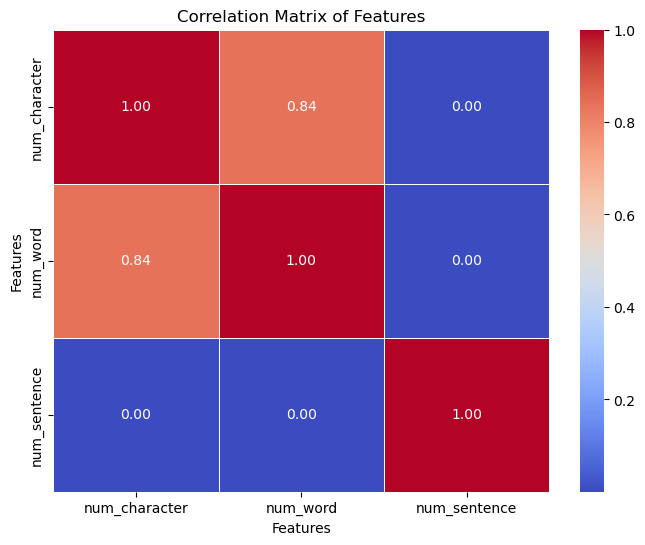

In [24]:
correlation_matrix = df[['num_character', 'num_word', 'num_sentence']].corr()
print(correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

## 4. Data Preprocessing

### 4.1. Text Preprocessing
Before building the models, the data needs to be preprocessed into a suitable format for analysis. This involves:
* lowercasing
* tokenisation
* removing special characters, stopwords, and punctuation
* stemming

In [25]:
# takes a while to run
# Creates new column called text_transform where the data will be preprocessed to
df['text_transform'] = df['text_combined'].str.lower() #copies data to new column and lowercase letters
df['text_transform'] = df['text_transform'].astype(str) #turns new column to string

# Tokenisation
df['text_transform'] = df['text_transform'].apply(word_tokenize)

# Removing special characters
df['text_transform'] = df['text_transform'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
df['text_transform'] = df['text_transform'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
df['text_transform'] = df['text_transform'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
df['text_transform'] = df['text_transform'].apply(lambda x: ' '.join(x))

In [26]:
# Display the preprocessed data
print(df[['text_combined', 'text_transform']].head(15))
print(df[['text_combined', 'text_transform']].sample(5))

                                        text_combined  \
0   hpl nom may 25 2001 see attached file hplno 52...   
1   nom actual vols 24 th forwarded sabrae zajac h...   
2   enron actuals march 30 april 1 201 estimated a...   
3   hpl nom may 30 2001 see attached file hplno 53...   
4   hpl nom june 1 2001 see attached file hplno 60...   
5   hpl nom may 31 2001 see attached file hplno 53...   
6   9760 tried get fancy address came back forward...   
7   hpl noms february 15 2000 see attached file hp...   
8   fw pooling contract template original message ...   
9   hpl nom march 28 2000 see attached file hplo 3...   
10  fw txu lone star pipeline standard pooling agr...   
11  enron hpl nom december 1 2000 see attached fil...   
12  hpl nom may 26 29 2001 see attached file hplno...   
13  enron hpl actuals november 13 2000 teco tap 12...   
14  txu noms 10 14 16 00 attached please find txu ...   

                                       text_transform  
0   hpl nom may 25 2001 see att

### 4.2. Most Common Words in Phishing Emails 

Top 10 Most Common Words in Phishing Emails:
2008: 32008 occurrences
10: 29418 occurrences
email: 28061 occurrences
aug: 28035 occurrences
top: 23185 occurrences
compani: 21639 occurrences
1: 20198 occurrences
go: 18653 occurrences
account: 18623 occurrences
pleas: 18559 occurrences


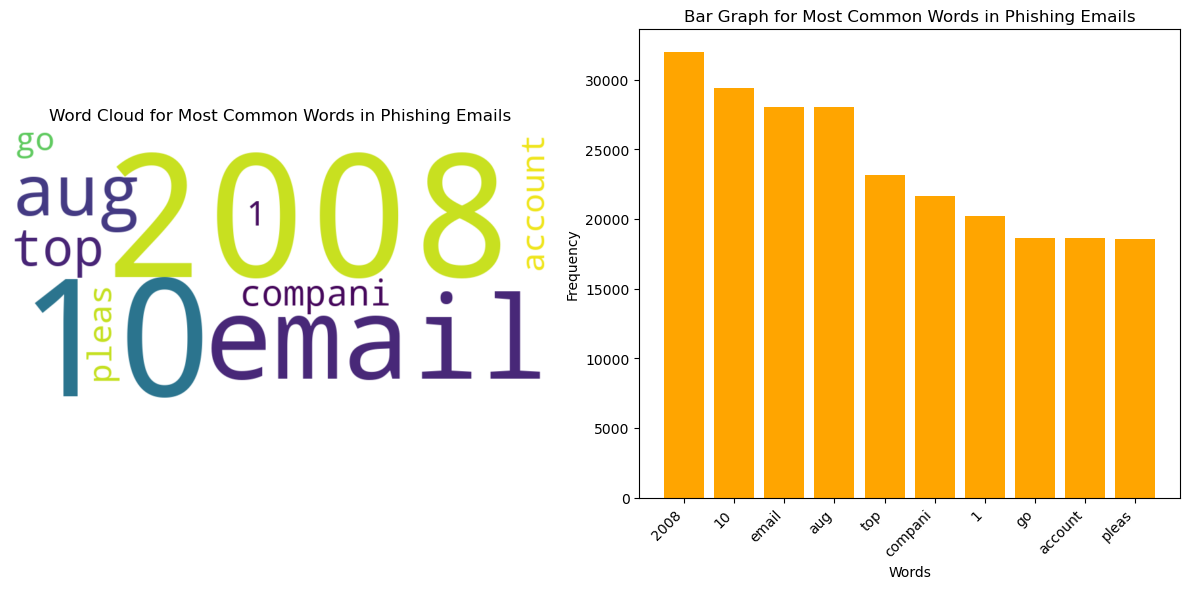

In [27]:
spam_emails = df[df['label'] == 1]['text_transform']

# Tokenise the text in phishing emails
spam_words = ' '.join(spam_emails).split()

# Counts occurrences of each word
word_counts = Counter(spam_words)

# Finds most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Phishing Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Phishing Emails')
plt.axis('off')

# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Phishing Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.3. Most Common Words in Regular Emails 

Top 10 Most Common Words in Regular Emails:
enron: 52710 occurrences
use: 36424 occurrences
1: 34288 occurrences
ect: 33928 occurrences
2008: 33611 occurrences
submissionid: 32246 occurrences
would: 25111 occurrences
new: 24704 occurrences
note: 23668 occurrences
submiss: 23636 occurrences


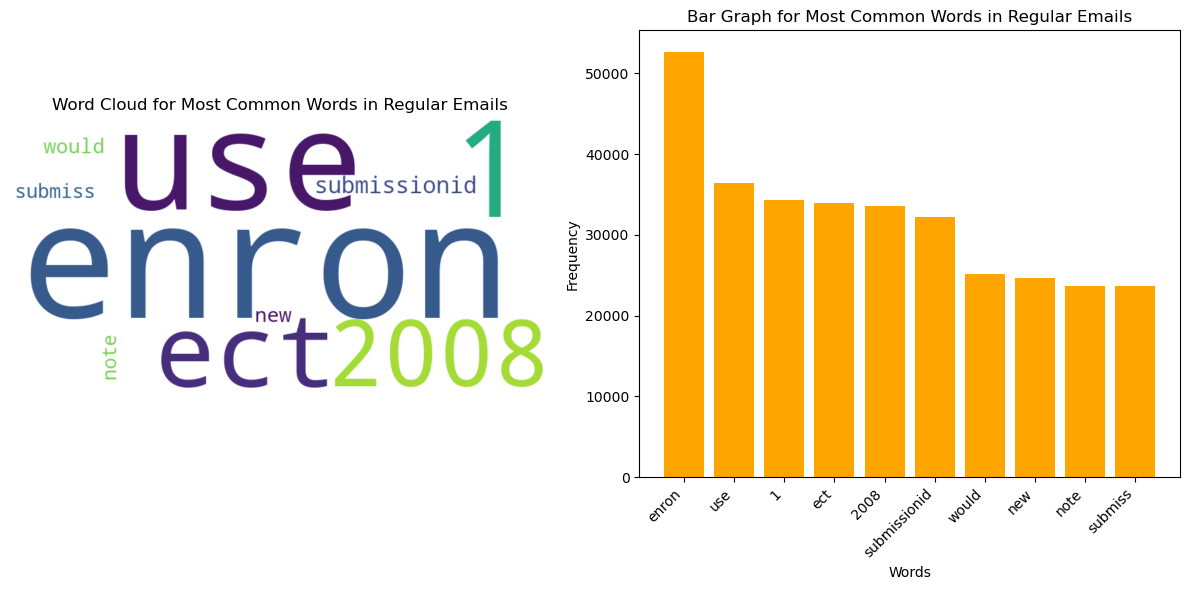

In [28]:
ham_emails = df[df['label'] == 0]['text_transform']

# Tokenise the text in spam emails
ham_words = ' '.join(ham_emails).split()

# Count occurrences of each word
word_counts = Counter(ham_words)

# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Regular Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Regular Emails')
plt.axis('off')

# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Regular Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Model Building

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

X = df['text_transform']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = CountVectorizer()
features = cv.fit_transform(X_train)

In [30]:
model = svm.SVC()
model.fit(features,y_train)


features_test = cv.transform(X_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.9685672514619883
